### 9. Закрепление знаний

Столбцы таблицы:

- RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
- CustomerId — идентификатор клиента
- Surname — фамилия клиента
- CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
- Geography — страна клиента (банк международный)
- Gender — пол клиента
- Age — возраст клиента
- Tenure — сколько лет клиент пользуется услугами банка
- Balance — баланс на счетах клиента в банке
- NumOfProducts — количество услуг банка, которые приобрёл клиент
- HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
- IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
- EstimatedSalary — предполагаемая заработная плата клиента
- Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

Итак, банк обращается к вам за помощью: он хочет разработать кампанию лояльности по удержанию клиентов, но для этого ему необходимо, чтобы вы выяснили основные причины оттока клиентов. Иными словами, нужно установить, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, определяющие клиентов.

После разведывательного анализа, с целью выявления наиболее важных признаков оттока, банк сможет построить модель машинного обучения, которая будет прогнозировать уход клиента. 

**9.1**<br>
Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению?

In [9]:
import pandas as pd
import seaborn as sns
import plotly
import plotly.express as px
import matplotlib.pyplot as plt
churn_data = pd.read_csv('data/churn.csv')
churn_data = churn_data.drop('RowNumber', axis=1)
display(churn_data.head())
churn_data.info()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


Text(0, 0.5, 'Количество клиентов')

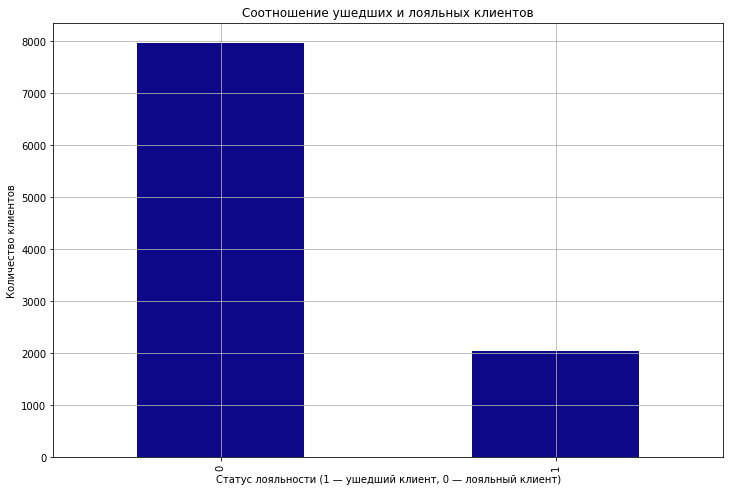

In [10]:
churn_df = churn_data['Exited'].value_counts()
churn_df.plot(
    kind='bar',
    grid=True,
    figsize=(12, 8),
    colormap='plasma'
);
plt.title('Соотношение ушедших и лояльных клиентов')
plt.xlabel('Статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)')
plt.ylabel('Количество клиентов')

Примерное соотношение между между ушедшими клиентами и лояльными клиентами банка составляет 1/4. Что говорит нам что в среднем 8 из 10ти клиентов банка остаются довольны качеством предоставляемых услуг и продолжают обслуживание, что является вполне хорошим показателем

**Задание 9.2**.<br> Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

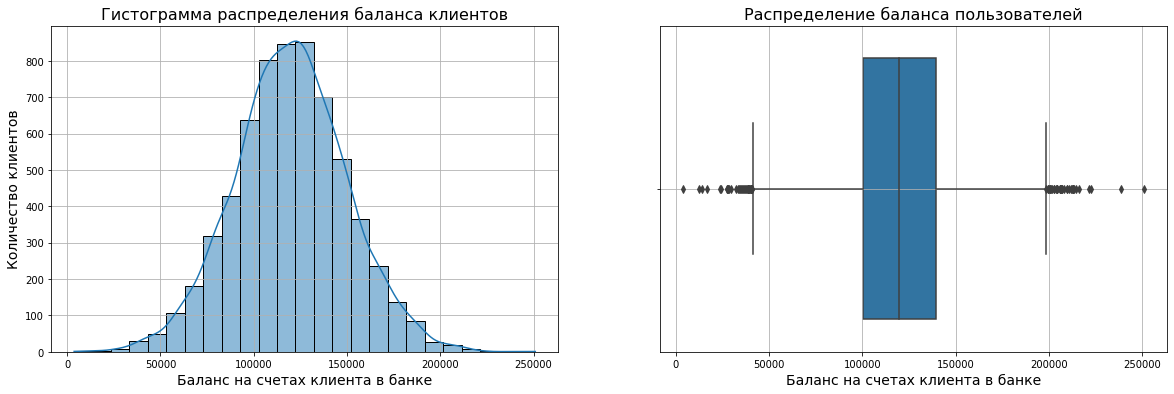

In [11]:
churn_df_2 = churn_data[(churn_data['Balance'] > 2500)]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
histplot = sns.histplot(
    data=churn_df_2,
    x='Balance',
    bins=25,
    kde=True,
    ax=axes[0]
);
histplot.set_title('Гистограмма распределения баланса клиентов', fontsize=16);
histplot.set_xlabel('Баланс на счетах клиента в банке', fontsize=14);
histplot.set_ylabel('Количество клиентов', fontsize=14);
histplot.grid()

boxplot = sns.boxplot(
    data=churn_df_2,
    x='Balance',
    orient='h',
    ax=axes[1]
)
boxplot.set_title('Распределение баланса пользователей', fontsize=16);
boxplot.set_xlabel('Баланс на счетах клиента в банке', fontsize=14);
boxplot.grid()

Исходя из графиков можно сделать выводы что большая часть клиентов банка более 800 человек имеет на счетах в банке около 120000 долларов, что является медианным значением. Расброс баланса на счетах в банке составляет прмерно от 35000 до 200000 долларов. Большая часть клиентов банка хранят на счетах от 100000 до 140000 долларов

**Задание 9.3**<br> Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

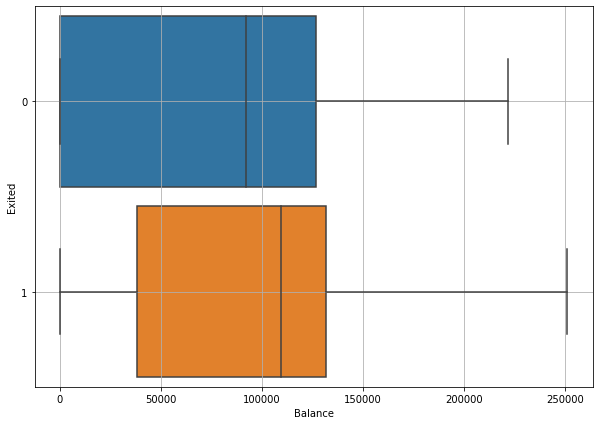

In [12]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Balance',
    orient='h',
    width=0.9
)
boxplot.grid()

Из графика видно, что границы распределения и межквартильный размах суммы на счетах ушедших клиентов смещены в правую сторону, а значит в среднем ушедшие клиенты хранили большие суммы на счетах в банке, чем лояльные. Также и медианное значение баланса у ушедших клиентов выше чем у лояльных. Предполагаю, что данная ситуация связана с отсутствием системы увеличения процентной ставки при увеличении суммы баланса на счете. Таким образом если предложить клиетам банка ступенчатое увеличение процентной ставки, при балансе счета более квартиля 25% в размере 38340 долларов и медианного значения в 109349 доларов, то отток клиентов уменьшится. 

**Задание 9.4**<br> Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

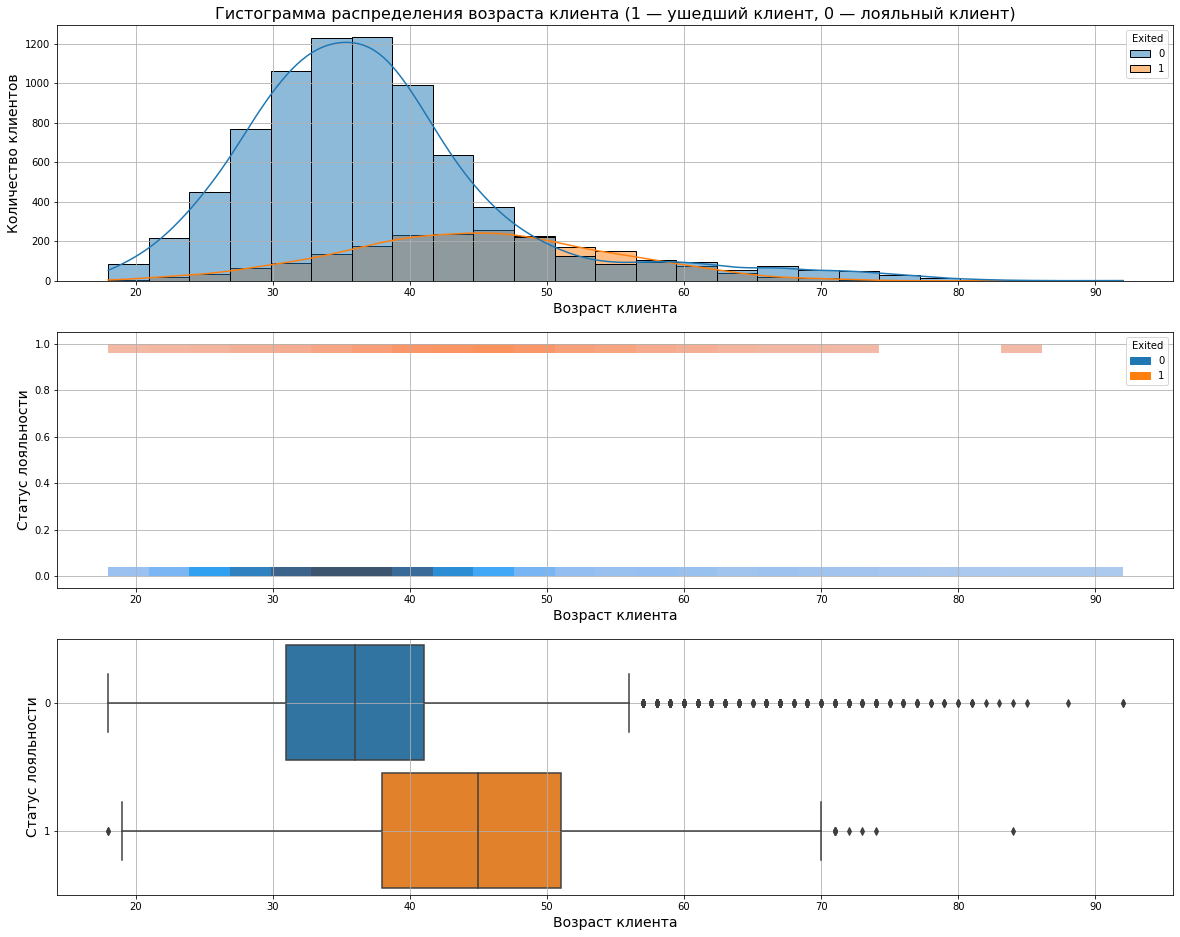

In [13]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20,16))
histplot = sns.histplot(
    data=churn_data,
    x='Age',
    bins=25,
    kde=True,
    hue='Exited',
    ax=axes[0]
);
histplot.set_title('Гистограмма распределения возраста клиента (1 — ушедший клиент, 0 — лояльный клиент)', fontsize=16);
histplot.set_xlabel('Возраст клиента', fontsize=14);
histplot.set_ylabel('Количество клиентов', fontsize=14);
histplot.grid()
      
histplot = sns.histplot(
    data=churn_data,
    x='Age',
    y='Exited',
    bins=25,
    kde=True,
    hue='Exited',
    ax=axes[1]
);
histplot.set_xlabel('Возраст клиента', fontsize=14);
histplot.set_ylabel('Статус лояльности', fontsize=14);
histplot.grid()

boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Age',
    orient='h',
    ax=axes[2],
    width=0.9
)
boxplot.set_xlabel('Возраст клиента', fontsize=14);
boxplot.set_ylabel('Статус лояльности', fontsize=14);
boxplot.grid()

Из гистограммы распределения возраста клиентов видно, что средний возраст лояльных клиентов составляет от 31 до 41 лет, а средний возраст ушедших клиентов составляет от 38 до 51 года, медианное значение возраста составляет 36 и 45 лет соответственно. Число потенциальных выбросов по возрасту среди группы лояльных клиентов значительно больше, чем в группе ушедших клиентов. Можно предположить, что пользователи с возрастом 56 и старше — это клиенты, которые намеренно или ошибочно указали неверный возраст, и среди лояльных клиентов их больше.

**Задание 9.5**<br> Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

<Figure size 2160x1512 with 0 Axes>

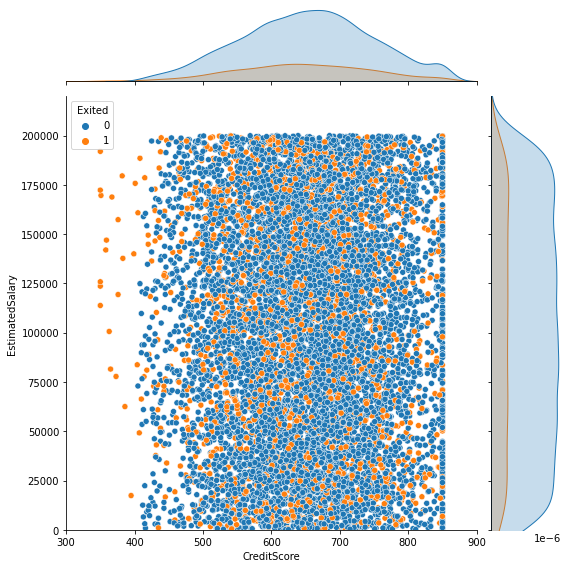

In [14]:
fig = plt.figure(figsize=(30,21))
jointplot = sns.jointplot(
    data=churn_data,
    x='CreditScore',
    y='EstimatedSalary',
    hue='Exited',
    height=8,
    xlim=(300,900),
    ylim=(0,220000)
)

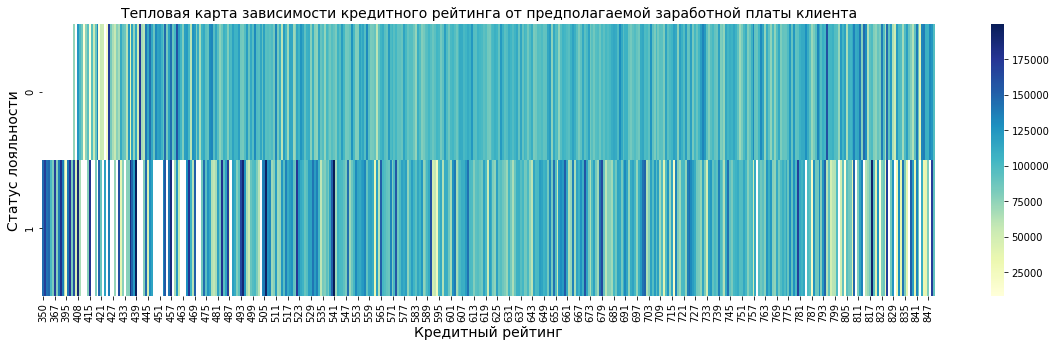

In [15]:
fig = plt.figure(figsize=(20,5))
pivot = churn_data.pivot_table(
    columns="CreditScore",
    values="EstimatedSalary", 
    index="Exited"
)

heatmap=sns.heatmap(pivot, cmap="YlGnBu")
heatmap.set_title('Тепловая карта зависимости кредитного рейтинга от предполагаемой заработной платы клиента', fontsize=14);
heatmap.set_xlabel('Кредитный рейтинг', fontsize=14);
heatmap.set_ylabel('Статус лояльности', fontsize=14);

График показывает, что происходит пропорциональное увеличение количества, как лояльных так и ушедших клиентов до кредитного рейтинга примерно 650, далее с увеличением кредитного рейтинга идет уменьшение кол-ва обеих категорий клиентов. Также среди ушедших клиентов наблюдается значительное количество человек с низким кредитным рейтингом до 400, но с большой предполагаемой зароботной платой более 175000 долларов. Что косвенно говорит о том, что ушедшие клиенты либо не довольны условиями кредитования, либо не нуждаются в получении кредита.

**Задание 9.6**<br>
Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

Подсказка
Процент ушедших клиентов в каждой группе можно рассчитать как среднее по столбцу Exited (так как 1 — это ушедшие клиенты, а 0 — лояльные, среднее арифметическое по столбцу обозначает долю ушедших клиентов).

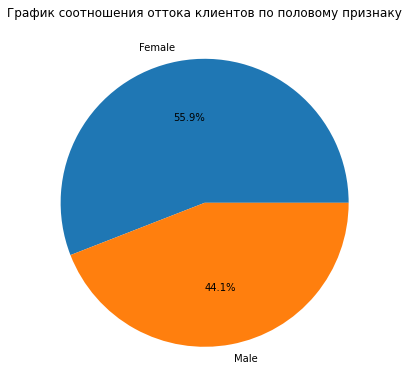

In [16]:
churn_df = churn_data[churn_data['Exited']==1]['Gender'].value_counts()
fig = plt.figure(figsize=(5,5))
axes = fig.add_axes([0,0,1,1])
axes.pie(
    churn_df,
    labels=churn_df.index,
    autopct='%.1f%%'
)
title= axes.set_title('График соотношения оттока клиентов по половому признаку')

График показывает, что из ушедших клиентов преобладающее кол-во составляют женщины: 55.9% против 44.1%. Разница является незначительной, а значит данный показатель не стоит учитывать в дальнейшем исследовании.

**Задание 9.7.** <br>Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

Text(0.5, 0, 'Среднее, медианное, стандартное отклонение, минимальное и максимальное количество приобретенных услуг лояльными и ушедшими клиентами соответственно')

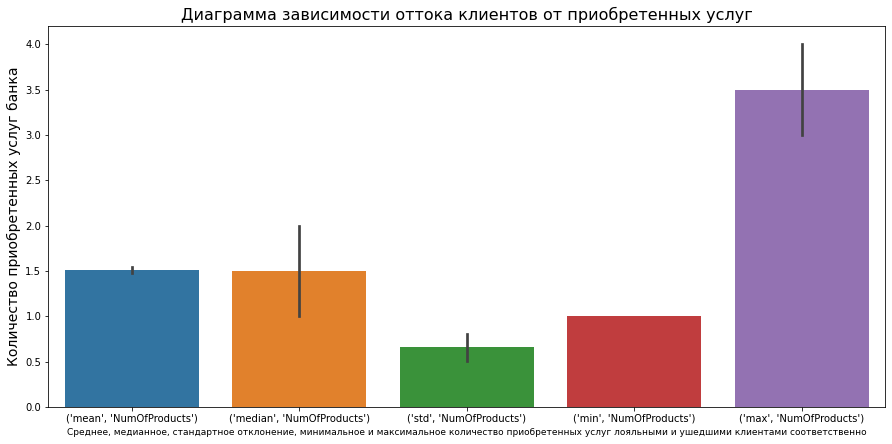

In [17]:
grouped_churn_df = churn_data.pivot_table(
    values='NumOfProducts',
    index='Exited',
    aggfunc=['mean','median','std','min','max']
)

fig = plt.figure(figsize=(15, 7))
barplot = sns.barplot(
    data=grouped_churn_df,
    
)
barplot.set_title('Диаграмма зависимости оттока клиентов от приобретенных услуг', fontsize=16);
barplot.set_ylabel('Количество приобретенных услуг банка', fontsize=14);
barplot.set_xlabel('Среднее, медианное, стандартное отклонение, минимальное и максимальное количество приобретенных услуг лояльными и ушедшими клиентами соответственно', fontsize=9)


In [18]:
grouped_churn_df = churn_data.groupby(['NumOfProducts','Exited'], as_index=False).count()
fig = px.bar(
    data_frame=grouped_churn_df,
    x='NumOfProducts',
    y='CustomerId',
    color='Exited',
    height=300,
    width=700,
    title='Диаграмма зависимости оттока клиентов от приобретенных услуг',
)
fig.update_xaxes(title_text='Количество приобретенных услуг')
fig.update_yaxes(title_text='Количество клиентов')
#fig.set_title('Диаграмма зависимости оттока клиентов от приобретенных услуг')
fig.show()

Графики показывают, что лояльные клиенты пользуются большим количеством услуг, чем ушедшие. Но максимальное значение используемых услуг ушедшими клиентами, больше чем лояльными. Возможно недавольство ушедших клиентов связано с одной из приобретенных услуг. Требуется дополнительное исследование перечня предлагаемых услуг банка.

**Задание 9.8.** <br> Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [19]:
grouped_churn_df = churn_data.groupby(['IsActiveMember','Exited'], as_index=False).count()
fig = px.bar(
    data_frame=grouped_churn_df,
    x='IsActiveMember',
    y='CustomerId',
    color='Exited',
    title='Диаграмма влияния статуса активного клиента на отток клиентов',
    height=500,
    width=800
    
)
fig.update_xaxes(title_text='Статус активного клиента банка(1-Да, 0-Нет)')
fig.update_yaxes(title_text='Количество клиентов')
fig.show()

График показывает, что среди неактивных клиентов ушедших клиентов значительно больше чем среди активных. Соответственно, чтобы уменьшить отток клиентов, требуется максимально информировать клиентов о деятельности банка, о новых предлагаемых услугах и достижениях, и  таким образом повышать активность клиентов

**Задание 9.9.** <br> В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [5]:
choropleth_data = churn_data.groupby(['Geography'])['Exited'].mean()
fig = px.choropleth(
    data_frame=choropleth_data, 
    locations=choropleth_data.index, 
    locationmode = "country names",
    color="Exited",
    range_color=[0,1],
    title='Тепловая картограмма соотношения ушедших клиентов по странам',
    width=800,
    height=500,
    color_continuous_scale='Reds'
)
fig.show()

Тепловая карта показывает, что в числе ушедших клиентов преобладают жители Германии.Возможно это связано с культурными особенностями клиентов из Германии и они не довольны спецификой предлагаемых услуг или в данном регионе присутствуют другие банки с лучшими предложениями.

**Задание 9.10.**<br> Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.
Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

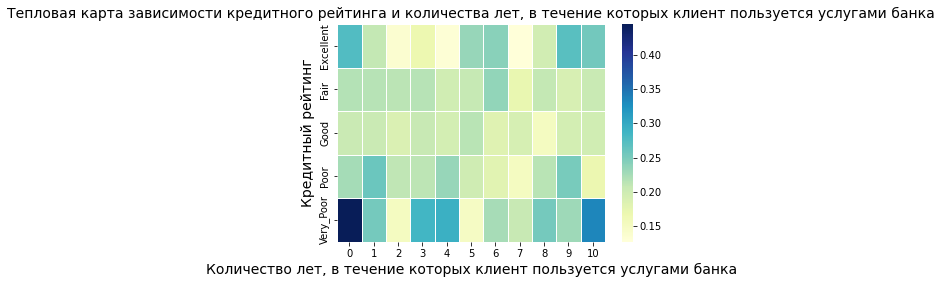

In [14]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)
pivot_churn_data = churn_data.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='mean'
)
heatmap=sns.heatmap(pivot_churn_data, cmap="YlGnBu", linewidth=1, linecolor='w')
heatmap.set_title('Тепловая карта зависимости кредитного рейтинга и количества лет, в течение которых клиент пользуется услугами банка', fontsize=14);
heatmap.set_xlabel('Количество лет, в течение которых клиент пользуется услугами банка', fontsize=14);
heatmap.set_ylabel('Кредитный рейтинг', fontsize=14);

Тепловая карта показывает, что чаще всего уходят клиенты с кредитным рейтингом "Very_poor" и которые пользуются услугами банка менее одного года. Скорее всего данная ситуация связана с невозможностью оплаты кредита. Дополнительно еще можно отметить уход клиентов с кредитным рейтингом "Very_poor", которые пользовались услугами банка 10лет, скорее всего данная ситуация связана с ипотечным кредитованиемю В целом видно, что клиенты с кредитным рейтингом "Good" и "Fair" являются лояльными клиентами и пользуются услугами банка значительно дольше остальных. Также стоит обратить внимание на частый уход клиентов с кредитным рейтингом "Excellent", в течение первото года использования и на 9-10 лет пользования услугами банка. Видимо данная категория клиентов не довольна условиями кредитования или другие банки предлагают более выгодные условия кредитования. 